In [1]:
import pandas as pd

paris_df = pd.read_csv("./additional/ParisHousing.csv")
boston_df = pd.read_csv("./additional/BostonHousingDataset.csv")

In [2]:
paris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [3]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
boston_df['rm'].fillna(boston_df['rm'].median(), inplace=True)

C:\Users\gorod\AppData\Local\Temp\ipykernel_13680\2269254709.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  boston_df['rm'].fillna(boston_df['rm'].median(), inplace=True)


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
# Разделим на признаки и целевую переменную (бостон)
X = boston_df.drop('medv', axis=1)
y = boston_df['medv']

# Нормализация
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделим на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [7]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Выходной слой для регрессии
])

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=0)

In [9]:
# Предсказания
y_pred = model.predict(X_test)

# Метрики
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.2f}')
print(f'R²: {r2:.2f}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
MSE: 12.49
R²: 0.83


In [10]:
# для paris
X_paris = paris_df.drop('price', axis=1)
y_paris = paris_df['price'] / 1000  # нормализация целевой переменной

scaler = StandardScaler()
X_paris_scaled = scaler.fit_transform(X_paris)

X_train, X_test, y_train, y_test = train_test_split(X_paris_scaled, y_paris, test_size=0.2, random_state=42)

# Модель
model_paris = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])
model_paris.compile(optimizer='adam', loss='mse')
history_paris = model_paris.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=0)

# Оценка
y_pred = model_paris.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Paris MSE: {mse:.2f}')
print(f'Paris R²: {r2:.2f}')


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Paris MSE: 67.79
Paris R²: 1.00


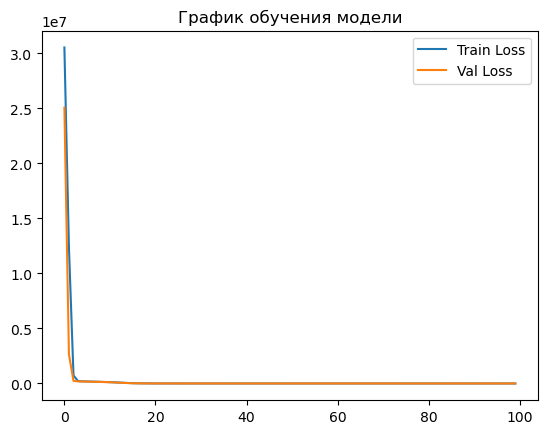

In [11]:
import matplotlib.pyplot as plt

plt.plot(history_paris.history['loss'], label='Train Loss')
plt.plot(history_paris.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('График обучения модели')
plt.show()

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import numpy as np

In [13]:
def train_model_with_pca(df, target_column, n_components=0.95, normalize_target=False):
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_squared_error, r2_score
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Input

    # Удалим пропуски
    df = df.dropna()

    # Разделим на признаки и целевую переменную
    X = df.drop(target_column, axis=1)
    y = df[target_column]

    # Нормализация целевой переменной (если нужно)
    if normalize_target:
        y = y / 1000

    # Масштабируем признаки
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Определим количество компонент, если задано как доля
    if isinstance(n_components, float):
        pca_temp = PCA()
        pca_temp.fit(X_scaled)
        explained = np.cumsum(pca_temp.explained_variance_ratio_)
        n_components_int = np.argmax(explained >= n_components) + 1
    else:
        n_components_int = n_components

    print(f'Выбрано компонент PCA: {n_components_int}')


    # Применим PCA
    pca = PCA(n_components=n_components_int)
    X_pca = pca.fit_transform(X_scaled)

    # Разделим на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

    # Построим модель
    model = Sequential([
        Input(shape=(n_components_int,)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')

    # Обучение с выводом метрик
    history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=1)

    # Оценка
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'\nИтоговые метрики:')
    print(f'MSE: {mse:.2f}')
    print(f'R²: {r2:.2f}')

    # График обучения
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('График обучения модели')
    plt.legend()
    plt.show()

    return mse, r2

Выбрано компонент PCA: 9
Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 587.3727 - val_loss: 504.5896
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 522.6622 - val_loss: 430.6255
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 425.1079 - val_loss: 323.0144
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 293.8391 - val_loss: 192.3193
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 159.4639 - val_loss: 91.8788
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 76.7768 - val_loss: 48.0052
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 46.3718 - val_loss: 36.1969
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 35.8819 - val_loss: 31.3593
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 30.4963 - val_loss: 29.1653
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 27.5170 - val_loss: 27.6257
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 25.2087 - val_loss: 26.9777
Epoch 

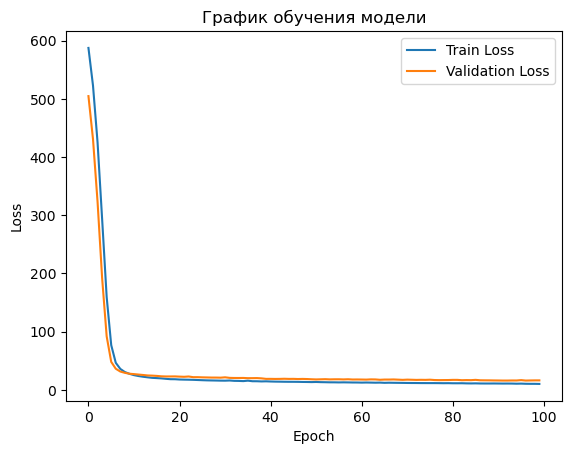

In [14]:
mse_boston_pca, r2_boston_pca = train_model_with_pca(boston_df, target_column='medv', n_components=0.95)


Выбрано компонент PCA: 15
Epoch 1/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 30279272.0000 - val_loss: 23949812.0000
Epoch 2/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 10553267.0000 - val_loss: 1778083.2500
Epoch 3/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 737065.3750 - val_loss: 361710.3125
Epoch 4/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 277510.4062 - val_loss: 225759.3125
Epoch 5/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 214466.4531 - val_loss: 202570.4062
Epoch 6/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 196619.9375 - val_loss: 188971.7344
Epoch 7/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 180718.5156 - val_loss: 172904.9219
Epoch 8/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 164232.5156 - val_loss: 157469.6562
Epoch 9/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 147214.0625 - val_loss: 140505.5469
Epoch 10/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 128808.8906 - val_loss: 121097.3

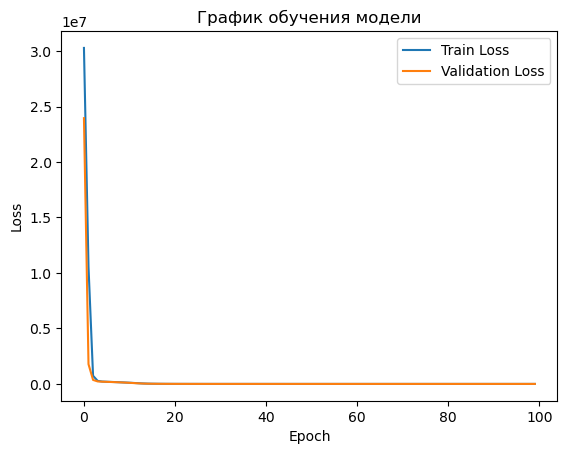

In [15]:
mse_paris_pca, r2_paris_pca = train_model_with_pca(paris_df, target_column='price', n_components=0.9, normalize_target=True)

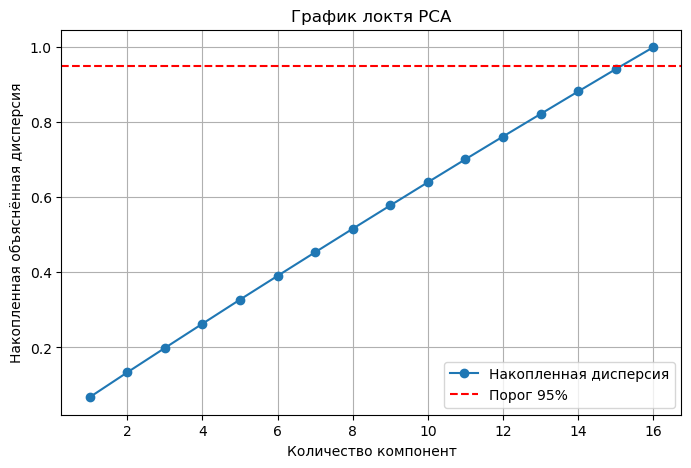

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Масштабируем признаки
X_1 = paris_df.drop('price', axis=1)
scaler = StandardScaler()
X_scaled_1 = scaler.fit_transform(X_1)

# Применим PCA без ограничения числа компонент
pca = PCA()
pca.fit(X_scaled_1)

# Объяснённая дисперсия
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# График
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', label='Накопленная дисперсия')
plt.axhline(y=0.95, color='r', linestyle='--', label='Порог 95%')
plt.xlabel('Количество компонент')
plt.ylabel('Накопленная объяснённая дисперсия')
plt.title('График локтя PCA')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
pip install neptune optuna neptune-optuna

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/14.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/14.1 MB 4.0 MB/s eta 0:00:04
   --- ------------------------------------ 1.3/14.1 MB 3.7 MB/s eta 0:00:04
   ----- ---------------------------------- 2.1/14.1 MB 3.6 MB/s eta 0:00:04
   -------- ------------------------------- 2.9/14.1 MB 3.5 MB/s eta 0:00:04
   ---------- ----------------------------- 3.7/14.1 MB 3.5 MB/s eta 0:00:03
   -------------- ------------------------- 5.0/14.1 MB 4.0 MB/s eta 0:00:03
   ----------------- ---------------------- 6.0/14.1 MB 4.2 MB/s eta 0:00:02
   -------------------- ------------------- 7.1/14.1 MB 4.3 MB/s eta 0:00:02
   ---------------------- ----------------- 8.1/14.1 MB 4.3 MB/s eta 0:00:02
   ------------------------- -------------- 9.2/14.1 MB 4

  DEPRECATION: Building 'bravado-core' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'bravado-core'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into accoun

In [5]:
import optuna
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
import neptune
from neptune.integrations.optuna import NeptuneCallback

# Инициализация Neptune
run = neptune.init_run(
    project="yuliyagorodnaya/optuna-paris",
    api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiIyOWEyOTljMy04YzJmLTQzMDYtOTZkZS02MjYwNGQ3YWZiYWMifQ==",
    name="Optuna Paris NN"
)

# Callback для Optuna
neptune_callback = NeptuneCallback(run)

# Целевая функция для Optuna
def objective(trial):
    # Гиперпараметры
    n_components = 0.95
    n_layers = trial.suggest_int("n_layers", 1, 3)
    n_units = trial.suggest_int("n_units", 32, 128)
    activation = trial.suggest_categorical("activation", ["relu", "tanh"])
    learning_rate = trial.suggest_float("learning_rate", 1e-4, 1e-2, log=True)
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64])
    epochs = 50

    # Логгируем параметры
    run[f"params/n_layers"] = n_layers
    run[f"params/n_units"] = n_units
    run[f"params/activation"] = activation
    run[f"params/learning_rate"] = learning_rate
    run[f"params/batch_size"] = batch_size
    run[f"optuna/trial_number"] = trial.number

    # Предобработка данных
    df = paris_df.dropna()
    X = df.drop("price", axis=1)
    y = df["price"]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    pca_temp = PCA()
    pca_temp.fit(X_scaled)
    explained = np.cumsum(pca_temp.explained_variance_ratio_)
    n_components_int = np.argmax(explained >= n_components) + 1
    run["pca/n_components"] = n_components_int

    pca = PCA(n_components=n_components_int)
    X_pca = pca.fit_transform(X_scaled)

    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

    # Модель
    model = Sequential()
    model.add(Input(shape=(n_components_int,)))
    for _ in range(n_layers):
        model.add(Dense(n_units, activation=activation))
    model.add(Dense(1))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse')

    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)

    # Логгируем потери по эпохам
    for epoch in range(epochs):
        run[f"training/loss/epoch_{epoch}"] = history.history["loss"][epoch]
        run[f"training/val_loss/epoch_{epoch}"] = history.history["val_loss"][epoch]

    # Оценка
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    run["metrics/mse"] = mse
    run["metrics/r2"] = r2

    return mse

# Запуск Optuna
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50, callbacks=[neptune_callback])

# Логгируем лучший результат
run["optuna/best_value"] = study.best_value
run["optuna/best_params"] = study.best_trial.params

# Завершаем логгирование
run.stop()


[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/yuliyagorodnaya/optuna-paris/e/OP-6


[I 2025-10-20 15:43:22,178] A new study created in memory with name: no-name-41e3a68e-1f7d-4986-b17e-80905d86fac2


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2025-10-20 15:43:49,176] Trial 0 finished with value: 3552691353.6084266 and parameters: {'n_layers': 2, 'n_units': 90, 'activation': 'relu', 'learning_rate': 0.003997282103575681, 'batch_size': 32}. Best is trial 0 with value: 3552691353.6084266.
[W 2025-10-20 15:43:49,270] Param batch_size unique value length is less than 2.
[W 2025-10-20 15:43:49,271] Param learning_rate unique value length is less than 2.
[W 2025-10-20 15:43:49,272] Param n_layers unique value length is less than 2.
[W 2025-10-20 15:43:49,273] Param n_units unique value length is less than 2.
[W 2025-10-20 15:43:49,275] Param activation unique value length is less than 2.
[W 2025-10-20 15:43:49,277] Param learning_rate unique value length is less than 2.
[W 2025-10-20 15:43:49,278] Param n_layers unique value length is less than 2.
[W 2025-10-20 15:43:49,278] Param n_units unique value length is less than 2.
[W 2025-10-20 15:43:49,279] Param activation unique value length is less than 2.
[W 2025-10-20 15:43:49,2

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2025-10-20 15:44:37,322] Trial 1 finished with value: 34856819720584.81 and parameters: {'n_layers': 2, 'n_units': 71, 'activation': 'tanh', 'learning_rate': 0.0015559871616767705, 'batch_size': 16}. Best is trial 0 with value: 3552691353.6084266.
[W 2025-10-20 15:44:37,333] Param n_layers unique value length is less than 2.
[W 2025-10-20 15:44:37,334] Param n_layers unique value length is less than 2.
[W 2025-10-20 15:44:37,336] Param n_layers unique value length is less than 2.
[W 2025-10-20 15:44:37,337] Param n_layers unique value length is less than 2.
[W 2025-10-20 15:44:37,340] Param n_layers unique value length is less than 2.
[W 2025-10-20 15:44:37,341] Param n_layers unique value length is less than 2.
[W 2025-10-20 15:44:37,343] Param n_layers unique value length is less than 2.
[W 2025-10-20 15:44:37,344] Param n_layers unique value length is less than 2.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2025-10-20 15:44:53,462] Trial 2 finished with value: 34599149870836.96 and parameters: {'n_layers': 1, 'n_units': 65, 'activation': 'relu', 'learning_rate': 0.001955797255410861, 'batch_size': 64}. Best is trial 0 with value: 3552691353.6084266.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2025-10-20 15:45:46,983] Trial 3 finished with value: 22420043.57190491 and parameters: {'n_layers': 3, 'n_units': 98, 'activation': 'relu', 'learning_rate': 0.0011064549104539592, 'batch_size': 16}. Best is trial 3 with value: 22420043.57190491.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2025-10-20 15:46:17,874] Trial 4 finished with value: 75701628022.34868 and parameters: {'n_layers': 3, 'n_units': 64, 'activation': 'relu', 'learning_rate': 0.0007548061028333201, 'batch_size': 32}. Best is trial 3 with value: 22420043.57190491.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2025-10-20 15:46:37,105] Trial 5 finished with value: 271719814434.40213 and parameters: {'n_layers': 3, 'n_units': 97, 'activation': 'relu', 'learning_rate': 0.000379613593623854, 'batch_size': 64}. Best is trial 3 with value: 22420043.57190491.


[neptune] [error  ] Unexpected error occurred in Neptune background thread: Killing Neptune ping thread. Your run's status will not be updated and the run will be shown as inactive.


Exception in thread NeptunePing:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/neptune/internal/backends/swagger_client_wrapper.py", line 111, in __call__
    return FinishedApiResponseFuture(future.response())  # wait synchronously
                                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/bravado/http_future.py", line 200, in response
    swagger_result = self._get_swagger_result(incoming_response)
                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/bravado/http_future.py", line 124, in wrapper
    return func(self, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/bravado/http_future.py", line 300, in _get_swagger_result
    unmarshal_response(
  File "/usr/local/lib/python3.12/dist-packages/bravado/http_future.py", line 353, in unmarshal_response
    raise_on_expected(incoming_response)
  

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2025-10-20 15:46:54,030] Trial 6 finished with value: 34442828588446.832 and parameters: {'n_layers': 1, 'n_units': 82, 'activation': 'relu', 'learning_rate': 0.0022671578497777687, 'batch_size': 64}. Best is trial 3 with value: 22420043.57190491.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2025-10-20 15:47:22,451] Trial 7 finished with value: 2570392616.205827 and parameters: {'n_layers': 2, 'n_units': 117, 'activation': 'relu', 'learning_rate': 0.003569306397241723, 'batch_size': 32}. Best is trial 3 with value: 22420043.57190491.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[I 2025-10-20 15:47:53,460] Trial 8 finished with value: 184149356.54582447 and parameters: {'n_layers': 3, 'n_units': 114, 'activation': 'relu', 'learning_rate': 0.0038565012427401626, 'batch_size': 32}. Best is trial 3 with value: 22420043.57190491.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2025-10-20 15:48:43,531] Trial 9 finished with value: 34873447401283.56 and parameters: {'n_layers': 3, 'n_units': 71, 'activation': 'tanh', 'learning_rate': 0.0004208495088126944, 'batch_size': 16}. Best is trial 3 with value: 22420043.57190491.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2025-10-20 15:49:32,351] Trial 10 finished with value: 34878858435497.55 and parameters: {'n_layers': 3, 'n_units': 34, 'activation': 'tanh', 'learning_rate': 0.00011256974595819163, 'batch_size': 16}. Best is trial 3 with value: 22420043.57190491.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2025-10-20 15:50:03,927] Trial 11 finished with value: 45489911.596178874 and parameters: {'n_layers': 3, 'n_units': 125, 'activation': 'relu', 'learning_rate': 0.007189539881628208, 'batch_size': 32}. Best is trial 3 with value: 22420043.57190491.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2025-10-20 15:50:59,884] Trial 12 finished with value: 25517205.51958822 and parameters: {'n_layers': 3, 'n_units': 128, 'activation': 'relu', 'learning_rate': 0.007647280380410131, 'batch_size': 16}. Best is trial 3 with value: 22420043.57190491.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2025-10-20 15:51:49,665] Trial 13 finished with value: 33693362.63493845 and parameters: {'n_layers': 2, 'n_units': 103, 'activation': 'relu', 'learning_rate': 0.008817582297003421, 'batch_size': 16}. Best is trial 3 with value: 22420043.57190491.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2025-10-20 15:52:45,632] Trial 14 finished with value: 34876618160329.035 and parameters: {'n_layers': 3, 'n_units': 127, 'activation': 'tanh', 'learning_rate': 0.00011324466477639564, 'batch_size': 16}. Best is trial 3 with value: 22420043.57190491.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2025-10-20 15:53:33,598] Trial 15 finished with value: 31230810499.874763 and parameters: {'n_layers': 2, 'n_units': 109, 'activation': 'relu', 'learning_rate': 0.0007266814772028523, 'batch_size': 16}. Best is trial 3 with value: 22420043.57190491.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[I 2025-10-20 15:54:21,876] Trial 16 finished with value: 85346169714.5876 and parameters: {'n_layers': 3, 'n_units': 41, 'activation': 'relu', 'learning_rate': 0.00033135742686805106, 'batch_size': 16}. Best is trial 3 with value: 22420043.57190491.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2025-10-20 15:55:09,035] Trial 17 finished with value: 2914568583.5232234 and parameters: {'n_layers': 2, 'n_units': 89, 'activation': 'relu', 'learning_rate': 0.0012619150918531945, 'batch_size': 16}. Best is trial 3 with value: 22420043.57190491.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2025-10-20 15:55:54,537] Trial 18 finished with value: 34874637989551.22 and parameters: {'n_layers': 1, 'n_units': 102, 'activation': 'tanh', 'learning_rate': 0.00023070793764750348, 'batch_size': 16}. Best is trial 3 with value: 22420043.57190491.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2025-10-20 15:56:43,294] Trial 19 finished with value: 1211892013.159901 and parameters: {'n_layers': 3, 'n_units': 52, 'activation': 'relu', 'learning_rate': 0.00575352480492657, 'batch_size': 16}. Best is trial 3 with value: 22420043.57190491.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2025-10-20 15:57:00,608] Trial 20 finished with value: 188925738655.80606 and parameters: {'n_layers': 2, 'n_units': 119, 'activation': 'relu', 'learning_rate': 0.0026916684988069445, 'batch_size': 64}. Best is trial 3 with value: 22420043.57190491.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2025-10-20 15:57:50,582] Trial 21 finished with value: 34664763.07862926 and parameters: {'n_layers': 2, 'n_units': 104, 'activation': 'relu', 'learning_rate': 0.009028541617357796, 'batch_size': 16}. Best is trial 3 with value: 22420043.57190491.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2025-10-20 15:58:42,466] Trial 22 finished with value: 2761366302.019799 and parameters: {'n_layers': 3, 'n_units': 93, 'activation': 'relu', 'learning_rate': 0.009511546134443261, 'batch_size': 16}. Best is trial 3 with value: 22420043.57190491.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2025-10-20 15:59:32,085] Trial 23 finished with value: 27319390.31002709 and parameters: {'n_layers': 2, 'n_units': 108, 'activation': 'relu', 'learning_rate': 0.007071640058753498, 'batch_size': 16}. Best is trial 3 with value: 22420043.57190491.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2025-10-20 16:00:19,028] Trial 24 finished with value: 11131398475617.947 and parameters: {'n_layers': 1, 'n_units': 110, 'activation': 'relu', 'learning_rate': 0.005290264183710803, 'batch_size': 16}. Best is trial 3 with value: 22420043.57190491.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2025-10-20 16:01:13,087] Trial 25 finished with value: 19344717.2319244 and parameters: {'n_layers': 3, 'n_units': 123, 'activation': 'relu', 'learning_rate': 0.0009192695017612981, 'batch_size': 16}. Best is trial 25 with value: 19344717.2319244.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2025-10-20 16:02:09,273] Trial 26 finished with value: 34856819655729.2 and parameters: {'n_layers': 3, 'n_units': 122, 'activation': 'tanh', 'learning_rate': 0.0009113234747742641, 'batch_size': 16}. Best is trial 25 with value: 19344717.2319244.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2025-10-20 16:03:04,119] Trial 27 finished with value: 261182505.5830653 and parameters: {'n_layers': 3, 'n_units': 125, 'activation': 'relu', 'learning_rate': 0.0005388330897847349, 'batch_size': 16}. Best is trial 25 with value: 19344717.2319244.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2025-10-20 16:03:24,008] Trial 28 finished with value: 448057922662.2706 and parameters: {'n_layers': 3, 'n_units': 128, 'activation': 'relu', 'learning_rate': 0.0002232546686027516, 'batch_size': 64}. Best is trial 25 with value: 19344717.2319244.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2025-10-20 16:04:14,752] Trial 29 finished with value: 24588963.0031279 and parameters: {'n_layers': 3, 'n_units': 82, 'activation': 'relu', 'learning_rate': 0.001287676751625393, 'batch_size': 16}. Best is trial 25 with value: 19344717.2319244.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2025-10-20 16:04:46,631] Trial 30 finished with value: 5832088793.643271 and parameters: {'n_layers': 3, 'n_units': 84, 'activation': 'relu', 'learning_rate': 0.0012169961029798821, 'batch_size': 32}. Best is trial 25 with value: 19344717.2319244.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[I 2025-10-20 16:05:38,212] Trial 31 finished with value: 67081065.05478873 and parameters: {'n_layers': 3, 'n_units': 76, 'activation': 'relu', 'learning_rate': 0.0016061569755013905, 'batch_size': 16}. Best is trial 25 with value: 19344717.2319244.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2025-10-20 16:06:31,036] Trial 32 finished with value: 335261781.06325465 and parameters: {'n_layers': 3, 'n_units': 88, 'activation': 'relu', 'learning_rate': 0.0006518195726224799, 'batch_size': 16}. Best is trial 25 with value: 19344717.2319244.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2025-10-20 16:07:23,568] Trial 33 finished with value: 46860921.66920499 and parameters: {'n_layers': 3, 'n_units': 95, 'activation': 'relu', 'learning_rate': 0.0010529560237245111, 'batch_size': 16}. Best is trial 25 with value: 19344717.2319244.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2025-10-20 16:08:14,980] Trial 34 finished with value: 176492799.31245577 and parameters: {'n_layers': 3, 'n_units': 58, 'activation': 'relu', 'learning_rate': 0.001679935230609974, 'batch_size': 16}. Best is trial 25 with value: 19344717.2319244.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2025-10-20 16:09:08,317] Trial 35 finished with value: 68370166.39371446 and parameters: {'n_layers': 3, 'n_units': 77, 'activation': 'relu', 'learning_rate': 0.0029849821995604057, 'batch_size': 16}. Best is trial 25 with value: 19344717.2319244.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2025-10-20 16:09:29,775] Trial 36 finished with value: 34866114143411.61 and parameters: {'n_layers': 3, 'n_units': 115, 'activation': 'tanh', 'learning_rate': 0.00226372236183007, 'batch_size': 64}. Best is trial 25 with value: 19344717.2319244.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2025-10-20 16:10:24,004] Trial 37 finished with value: 820442017.2704633 and parameters: {'n_layers': 3, 'n_units': 98, 'activation': 'relu', 'learning_rate': 0.0005300909362718147, 'batch_size': 16}. Best is trial 25 with value: 19344717.2319244.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2025-10-20 16:10:57,185] Trial 38 finished with value: 1878536073672.7236 and parameters: {'n_layers': 2, 'n_units': 70, 'activation': 'relu', 'learning_rate': 0.0009202959210324992, 'batch_size': 32}. Best is trial 25 with value: 19344717.2319244.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[I 2025-10-20 16:11:19,415] Trial 39 finished with value: 103043436165.78232 and parameters: {'n_layers': 3, 'n_units': 121, 'activation': 'relu', 'learning_rate': 0.0013488824861394486, 'batch_size': 64}. Best is trial 25 with value: 19344717.2319244.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2025-10-20 16:12:16,169] Trial 40 finished with value: 36732991.56189548 and parameters: {'n_layers': 3, 'n_units': 113, 'activation': 'relu', 'learning_rate': 0.0020082292155451467, 'batch_size': 16}. Best is trial 25 with value: 19344717.2319244.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2025-10-20 16:13:07,423] Trial 41 finished with value: 33918602.96744703 and parameters: {'n_layers': 2, 'n_units': 106, 'activation': 'relu', 'learning_rate': 0.004601859117689536, 'batch_size': 16}. Best is trial 25 with value: 19344717.2319244.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[I 2025-10-20 16:13:59,370] Trial 42 finished with value: 37367110.43005982 and parameters: {'n_layers': 2, 'n_units': 99, 'activation': 'relu', 'learning_rate': 0.0070008319894727, 'batch_size': 16}. Best is trial 25 with value: 19344717.2319244.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2025-10-20 16:14:50,018] Trial 43 finished with value: 11321628.700967787 and parameters: {'n_layers': 2, 'n_units': 110, 'activation': 'relu', 'learning_rate': 0.002991804368951167, 'batch_size': 16}. Best is trial 43 with value: 11321628.700967787.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2025-10-20 16:15:36,035] Trial 44 finished with value: 17116464791695.305 and parameters: {'n_layers': 1, 'n_units': 118, 'activation': 'relu', 'learning_rate': 0.0041620191316244885, 'batch_size': 16}. Best is trial 43 with value: 11321628.700967787.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2025-10-20 16:16:03,502] Trial 45 finished with value: 34843260418373.406 and parameters: {'n_layers': 1, 'n_units': 114, 'activation': 'tanh', 'learning_rate': 0.003025379270860433, 'batch_size': 32}. Best is trial 43 with value: 11321628.700967787.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2025-10-20 16:16:56,916] Trial 46 finished with value: 26806295.085346743 and parameters: {'n_layers': 3, 'n_units': 111, 'activation': 'relu', 'learning_rate': 0.0008052434404618777, 'batch_size': 16}. Best is trial 43 with value: 11321628.700967787.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2025-10-20 16:17:51,379] Trial 47 finished with value: 96669427.50761868 and parameters: {'n_layers': 3, 'n_units': 123, 'activation': 'relu', 'learning_rate': 0.0017407216214045552, 'batch_size': 16}. Best is trial 43 with value: 11321628.700967787.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2025-10-20 16:18:43,163] Trial 48 finished with value: 30953958.428337008 and parameters: {'n_layers': 3, 'n_units': 83, 'activation': 'relu', 'learning_rate': 0.0011185398038971914, 'batch_size': 16}. Best is trial 43 with value: 11321628.700967787.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2025-10-20 16:19:34,226] Trial 49 finished with value: 34794512990057.625 and parameters: {'n_layers': 2, 'n_units': 118, 'activation': 'tanh', 'learning_rate': 0.0035281148095637257, 'batch_size': 16}. Best is trial 43 with value: 11321628.700967787.


[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!
[neptune] [info   ] Waiting for the remaining 164 operations to synchronize with Neptune. Do not kill this process.
[neptune] [info   ] All 164 operations synced, thanks for waiting!
[neptune] [info   ] Explore the metadata in the Neptune app: https://app.neptune.ai/yuliyagorodnaya/optuna-paris/e/OP-6/metadata
